In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [48]:
def convert_rgb_to_gray(im1):
    m=im1.shape[0]
    n=im1.shape[1]
    im2=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            im2[i,j]=get_distance(im1[i,j,:])
    return im2
def get_distance(v,w=[1/3,1/3,1/3]):
    a,b,c=v[0],v[1],v[2]
    w1,w2,w3=w[0],w[1],w[2]
    # karekok icinde a^2+b^2+c^2
    d=((a**2)*w1 +
    (b**2)*w2 +
    (c**2)*w3)**.5
    # d=((a*w1)**2+(b*w2)**2+(c*w3)**2)**0.5
    return d


In [52]:
block_1 = np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9
block_1

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [55]:
sum(block_1)

array([0.33333333, 0.33333333, 0.33333333])

In [54]:
sum(sum(block_1))

1.0

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0xfa9e1d8>)

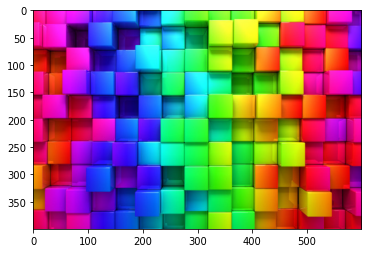

In [60]:
im_1 = mpimg.imread('renk.jpg')
im_2 = convert_rgb_to_gray(im_1)
%matplotlib inline
plt.figure(figsize=(20,20)) #resmi buyutmek icin kullandik
plt.subplot(1,3,1),plt.imshow(im_1)

In [61]:
def get_default_mask_for_mean(): 
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9
def apply_mask(part_of_image):
    mask = get_default_mask_for_mean()
    return sum(sum(part_of_image*mask))
def get_median_for_55(poi):
    s1 = poi.reshape(1,25) 
    s1.sort()
    return s1[0,13]
def get_median(poi):
    s1 = poi.reshape(1,9)
    s1.sort() 
    return s1[0,4]
def get_mean_filter_for_55(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1]
    im_2 = np.zeros((m,n))
    
    for i in range (3,m-3):
        for j in range (3,n-3):
            poi = im_1[i-2:i+3,j-2:j+3]
            im_2[i,j] = get_median_for_55(poi)
    return im_2
def get_mean_filter(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1]
    im_2 = np.zeros((m,n))
    
    for i in range (1,m-1):
        for j in range (1,n-1):
            poi = im_1[i-1:i+2,j-1:j+2]
            im_2[i,j] = get_median(poi)
    return im_2

In [37]:
apply_mask(im_2[1:4,1:4])

161.7954000131401

In [46]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x44d9ee0>)

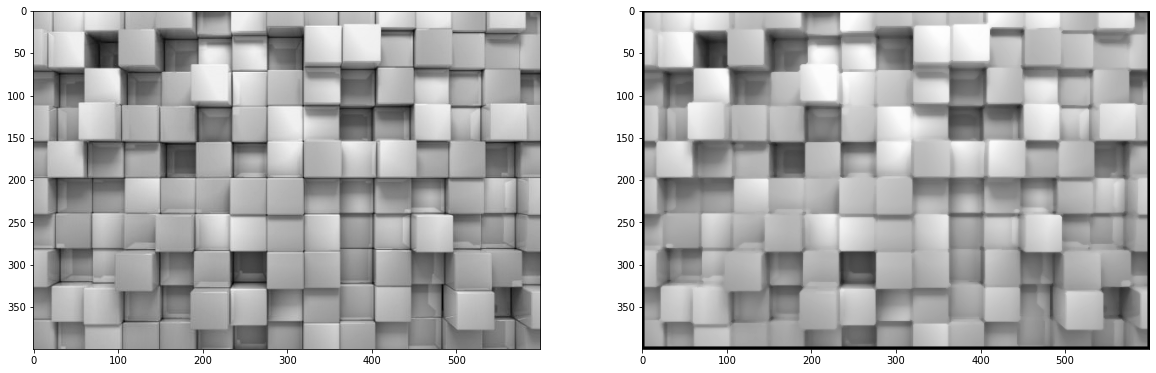

In [44]:
im_55 = get_mean_filter_for_55(im_2)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(im_2, cmap = 'gray')
plt.subplot(1,2,2),plt.imshow(im_55, cmap = 'gray')